In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## New

### 1. rollout/return

In [26]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[0]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/"+itv+"/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point125\run_SARA_1569269306gra139_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point125\run_SARA_1569269307gra139_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point125\run_PLA_1569269984gra96_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point125\run_PLA_1569269985gra96_file.csv
Random: 0 files found


In [27]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [28]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_run1,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_avg,rollout/Q_mean_std
0,5.259774,7.054739,6.157256,0.897482,0.011680,-0.004043,0.003818,0.007862
1,6.267679,5.992143,6.129911,0.137768,0.100898,0.147518,0.124208,0.023310
2,4.612448,3.008867,3.810657,0.801791,0.122107,0.157495,0.139801,0.017694
3,2.741465,4.654927,3.698196,0.956731,0.102295,0.173778,0.138037,0.035741
4,6.361083,5.678896,6.019989,0.341093,0.115978,0.193589,0.154784,0.038805
5,3.471207,7.707893,5.589550,2.118343,0.130696,0.205821,0.168258,0.037563
6,6.926388,12.506403,9.716396,2.790007,0.140287,0.241533,0.190910,0.050623
7,6.684607,25.892282,16.288445,9.603838,0.165029,0.330391,0.247710,0.082681
8,5.912284,25.859135,15.885710,9.973425,0.180566,0.411907,0.296236,0.115671
9,6.412274,25.892429,16.152352,9.740077,0.196178,0.490343,0.343261,0.147082


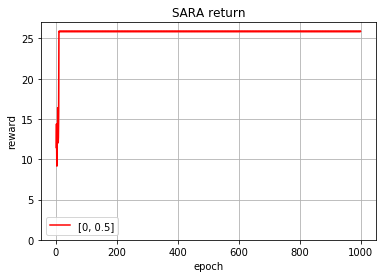

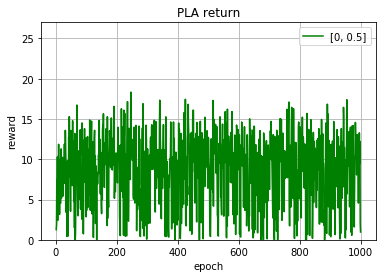

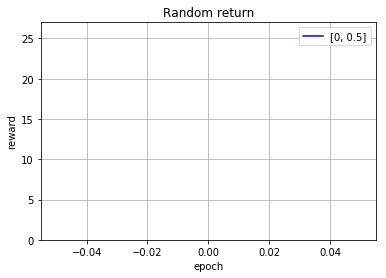

In [24]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig('./plots_for_thesis/debug/{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


### 2.rollout/Q_mean

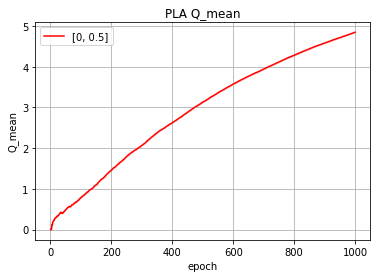

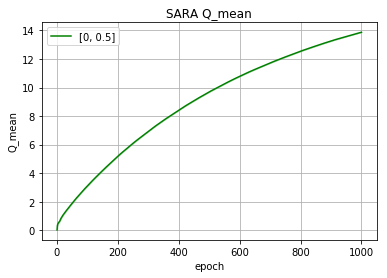

In [25]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    